In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfGeneModel = pd.read_csv('./GCF_001654055.1_ASM165405v1_genomic.gff.gz', compression='gzip', sep='\t', comment='#',header=None)

In [3]:
dfGeneModel.head(10)

,0,1,2,3,4,5,6,7,8
0,NW_018745690.1,RefSeq,region,1,6409783,.,+,.,ID=NW_018745690.1:1..6409783;Dbxref=taxon:3981...
1,NW_018745690.1,Gnomon,gene,368962,379049,.,+,.,ID=gene-LOC110654056;Dbxref=GeneID:110654056;N...
2,NW_018745690.1,Gnomon,mRNA,368962,379049,.,+,.,ID=rna-XM_021809960.1;Parent=gene-LOC110654056...
3,NW_018745690.1,Gnomon,exon,368962,369344,.,+,.,ID=exon-XM_021809960.1-1;Parent=rna-XM_0218099...
4,NW_018745690.1,Gnomon,exon,371578,371797,.,+,.,ID=exon-XM_021809960.1-2;Parent=rna-XM_0218099...
5,NW_018745690.1,Gnomon,exon,371951,372662,.,+,.,ID=exon-XM_021809960.1-3;Parent=rna-XM_0218099...
6,NW_018745690.1,Gnomon,exon,378817,379049,.,+,.,ID=exon-XM_021809960.1-4;Parent=rna-XM_0218099...
7,NW_018745690.1,Gnomon,CDS,368962,369344,.,+,0,ID=cds-XP_021665652.1;Parent=rna-XM_021809960....
8,NW_018745690.1,Gnomon,CDS,371578,371797,.,+,1,ID=cds-XP_021665652.1;Parent=rna-XM_021809960....
9,NW_018745690.1,Gnomon,CDS,371951,372662,.,+,0,ID=cds-XP_021665652.1;Parent=rna-XM_021809960....


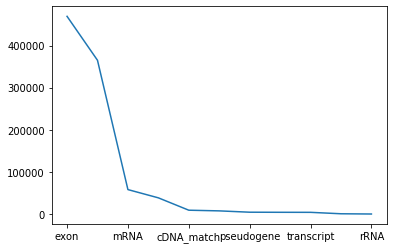

In [4]:
dfGeneModel[2].value_counts().plot()

In [5]:
# 38,000 genes
# 5,000 mRNAs for 1.3 Gb genome (rubber tree)

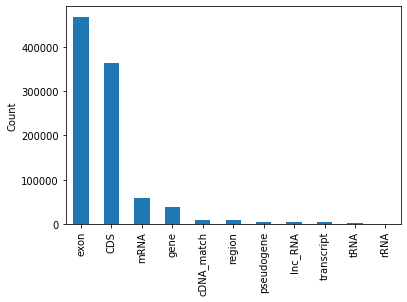

In [6]:
dfGeneModel[2].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.savefig("Rubber_tree_genemodel_componenet_count.png", dpi=200, bbox_inches='tight')

In [7]:
m = dfGeneModel[2] =='lnc_RNA'

In [8]:
m

0         False
1         False
2         False
3         False
4         False
          ...  
960133    False
960134    False
960135    False
960136    False
960137    False
Name: 2, Length: 960138, dtype: bool

In [9]:
dfGeneModel[m].shape

(4081, 9)

In [10]:
dfGeneModelLncRNA = dfGeneModel[m]

In [11]:
dfGeneModelLncRNA

,0,1,2,3,4,5,6,7,8
194,NW_018745690.1,Gnomon,lnc_RNA,421973,424021,.,-,.,ID=rna-XR_002494566.1;Parent=gene-LOC110652099...
547,NW_018745690.1,Gnomon,lnc_RNA,2689921,2699060,.,-,.,ID=rna-XR_002498016.1;Parent=gene-LOC110670825...
551,NW_018745690.1,Gnomon,lnc_RNA,2696622,2699060,.,-,.,ID=rna-XR_002498073.1;Parent=gene-LOC110670825...
1060,NW_018745690.1,Gnomon,lnc_RNA,3912887,3915293,.,-,.,ID=rna-XR_002491419.1;Parent=gene-LOC110636325...
1064,NW_018745690.1,Gnomon,lnc_RNA,3913892,3915293,.,-,.,ID=rna-XR_002491361.1;Parent=gene-LOC110636325...
...,...,...,...,...,...,...,...,...,...
959340,NW_018752783.1,Gnomon,lnc_RNA,41,1111,.,+,.,ID=rna-XR_002494544.1;Parent=gene-LOC110653271...
959626,NW_018753006.1,Gnomon,lnc_RNA,1,1035,.,-,.,ID=rna-XR_002494545.1;Parent=gene-LOC110653281...
959630,NW_018753006.1,Gnomon,lnc_RNA,1,1035,.,-,.,ID=rna-XR_002494546.1;Parent=gene-LOC110653281...
959662,NW_018753033.1,Gnomon,lnc_RNA,364,1032,.,-,.,ID=rna-XR_002494547.1;Parent=gene-LOC110653282...


In [12]:
dfGeneModelLncRNA.loc[194][8]

'ID=rna-XR_002494566.1;Parent=gene-LOC110652099;Dbxref=GeneID:110652099,Genbank:XR_002494566.1;Name=XR_002494566.1;gbkey=ncRNA;gene=LOC110652099;model_evidence=Supporting evidence includes similarity to: 100%25 coverage of the annotated genomic feature by RNAseq alignments%2C including 32 samples with support for all annotated introns;product=uncharacterized LOC110652099;transcript_id=XR_002494566.1'

In [13]:
def funInfoParse(x):
    listInfo = []
    for each in x.split(';'):
        listInfo.append(each.split('='))
        return dict(listInfo)

In [14]:
dfGeneModelLncRNA[8].values[0]

'ID=rna-XR_002494566.1;Parent=gene-LOC110652099;Dbxref=GeneID:110652099,Genbank:XR_002494566.1;Name=XR_002494566.1;gbkey=ncRNA;gene=LOC110652099;model_evidence=Supporting evidence includes similarity to: 100%25 coverage of the annotated genomic feature by RNAseq alignments%2C including 32 samples with support for all annotated introns;product=uncharacterized LOC110652099;transcript_id=XR_002494566.1'

In [15]:
dfGeneModelLncRNA[8]

194       ID=rna-XR_002494566.1;Parent=gene-LOC110652099...
547       ID=rna-XR_002498016.1;Parent=gene-LOC110670825...
551       ID=rna-XR_002498073.1;Parent=gene-LOC110670825...
1060      ID=rna-XR_002491419.1;Parent=gene-LOC110636325...
1064      ID=rna-XR_002491361.1;Parent=gene-LOC110636325...
                                ...                        
959340    ID=rna-XR_002494544.1;Parent=gene-LOC110653271...
959626    ID=rna-XR_002494545.1;Parent=gene-LOC110653281...
959630    ID=rna-XR_002494546.1;Parent=gene-LOC110653281...
959662    ID=rna-XR_002494547.1;Parent=gene-LOC110653282...
959684    ID=rna-XR_002494548.1;Parent=gene-LOC110653283...
Name: 8, Length: 4081, dtype: object

In [16]:
dfGeneModelLncRNA[8].apply(funInfoParse)

194       {'ID': 'rna-XR_002494566.1'}
547       {'ID': 'rna-XR_002498016.1'}
551       {'ID': 'rna-XR_002498073.1'}
1060      {'ID': 'rna-XR_002491419.1'}
1064      {'ID': 'rna-XR_002491361.1'}
                      ...             
959340    {'ID': 'rna-XR_002494544.1'}
959626    {'ID': 'rna-XR_002494545.1'}
959630    {'ID': 'rna-XR_002494546.1'}
959662    {'ID': 'rna-XR_002494547.1'}
959684    {'ID': 'rna-XR_002494548.1'}
Name: 8, Length: 4081, dtype: object

In [17]:
dfGeneModelLncRNA['product'] = dfGeneModelLncRNA[8].apply(funInfoParse)

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
dfGeneModelLncRNA.to_csv('rubbertreeLncRNA.csv')

In [19]:
def fasta2dic(filename):
    dic = {}
    f   = open(filename)
    fr  = f.read()
    for each in fr.split('>')[1:]:
        strHeader = each.split('\n')[0].split()[0]
        strSeq    = ''.join(each.split('\n')[1:])
        dic[strHeader] = strSeq
    return dic

In [20]:
dicFa = fasta2dic('./GCF_001654055.1_ASM165405v1_genomic.fna/GCF_001654055.1_ASM165405v1_genomic.fna')

In [21]:
dfGeneModelLncRNA.head()

,0,1,2,3,4,5,6,7,8,product
194,NW_018745690.1,Gnomon,lnc_RNA,421973,424021,.,-,.,ID=rna-XR_002494566.1;Parent=gene-LOC110652099...,{'ID': 'rna-XR_002494566.1'}
547,NW_018745690.1,Gnomon,lnc_RNA,2689921,2699060,.,-,.,ID=rna-XR_002498016.1;Parent=gene-LOC110670825...,{'ID': 'rna-XR_002498016.1'}
551,NW_018745690.1,Gnomon,lnc_RNA,2696622,2699060,.,-,.,ID=rna-XR_002498073.1;Parent=gene-LOC110670825...,{'ID': 'rna-XR_002498073.1'}
1060,NW_018745690.1,Gnomon,lnc_RNA,3912887,3915293,.,-,.,ID=rna-XR_002491419.1;Parent=gene-LOC110636325...,{'ID': 'rna-XR_002491419.1'}
1064,NW_018745690.1,Gnomon,lnc_RNA,3913892,3915293,.,-,.,ID=rna-XR_002491361.1;Parent=gene-LOC110636325...,{'ID': 'rna-XR_002491361.1'}


In [22]:
dicFa['NW_018745690.1'][421973-1:424021]

'CCTCATCACCAGGATTTTTGTCAGGGTGTAGCCGCAAGGCCAACTTATAGTATGCTTTCTTTATTTCCTGTTGAGATGCTGTCCGCTCAACCCCAAGAACCTACAAGAAATGGGTGGTTATTTGCTAAATCTTACTCCAGCAcaacttaaaatttatataatcatGACAAGAGTGAGTAATTGACAGGACAAGATAAAGATAAAAGTAGATTGAAAGATGAACACTTCAAACATTAGCCTAAGCAGACAGCAAGTCAGGAACTACAAAGGAAAGCAAACAGACGTATGTAAATGCAGAATTTTGAAATAGTTGTCACCTACTTAGCAAAATAAGAACCAAAGTGATACAGATCAAAGCAAGGAGATGGCCCCAGCAGGAAACCCAAGGAAACTTAGAGTGTAttttcaaagaaagaagaaaggcacAGCTGCAGCTTCTGGAAATGAAGGGCTGGAAGGGAATTGATTGGAAAAGCAAATTCTATTGGAGAGAATTGCAGAAGGACCATCTGGAGATGCTTCCAACAGAtgggagaaagaaaaagaaaaagaaaaaaaaaagaccaaaGCTCTATAAATAAAACAAGATAGAGAAGGGAATGGTGTGTGTGATTTATACTATGCATCAACAATTTTGCTTGGGCTAGAGGAACTGGTACCTCTGGTTATTTAGAATTCTGTTGTCATTTAATGTGATTTTGTAATAGTGAGCTGAGAGGAGATTGTGAGTATTGCTGAAAAAATTGTTCTGTGAAACTCTTATTTCCACTAATCAATACAATACATTGTTATCGTTCTTTCCAAATTCTTGTTATTCATCCTTTAGTCTATCAATTTGGTCCGACTTGCTGGATCCATCTGGGAGTGACTGCCCAAATCAAGAATGGAAGCTCAAGTGGAAGGGACAAAGAGGTACAAGGCCACATTAAAAGAAGGGTTACTAAAGCTATGCAATAACAGACAACAACAAGACCAAATACTTAATGGTCTTTGGGATGA

In [23]:
dfGeneModelLncRNA['Sequence'] = dfGeneModelLncRNA.apply(lambda x : dicFa[x[0]][x[3]-1:x[4]], axis=1)

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
dfGeneModelLncRNA

,0,1,2,3,4,5,6,7,8,product,Sequence
194,NW_018745690.1,Gnomon,lnc_RNA,421973,424021,.,-,.,ID=rna-XR_002494566.1;Parent=gene-LOC110652099...,{'ID': 'rna-XR_002494566.1'},CCTCATCACCAGGATTTTTGTCAGGGTGTAGCCGCAAGGCCAACTT...
547,NW_018745690.1,Gnomon,lnc_RNA,2689921,2699060,.,-,.,ID=rna-XR_002498016.1;Parent=gene-LOC110670825...,{'ID': 'rna-XR_002498016.1'},tgtgaggtgacacggacactatgcagaactgcaggatggacttacc...
551,NW_018745690.1,Gnomon,lnc_RNA,2696622,2699060,.,-,.,ID=rna-XR_002498073.1;Parent=gene-LOC110670825...,{'ID': 'rna-XR_002498073.1'},atattaaacctaaaagtattatattaaaattaatcgtCAAAATCTC...
1060,NW_018745690.1,Gnomon,lnc_RNA,3912887,3915293,.,-,.,ID=rna-XR_002491419.1;Parent=gene-LOC110636325...,{'ID': 'rna-XR_002491419.1'},tattatttattaaaactgAGTAAGAGAAAGTTTGATTAAATCCAGA...
1064,NW_018745690.1,Gnomon,lnc_RNA,3913892,3915293,.,-,.,ID=rna-XR_002491361.1;Parent=gene-LOC110636325...,{'ID': 'rna-XR_002491361.1'},tttttttttttaaatcaaagaaATTCCACTAtcctaaattaaaaca...
...,...,...,...,...,...,...,...,...,...,...,...
959340,NW_018752783.1,Gnomon,lnc_RNA,41,1111,.,+,.,ID=rna-XR_002494544.1;Parent=gene-LOC110653271...,{'ID': 'rna-XR_002494544.1'},AAATTTTAGACCCAGCCTGCAGCAGCAAATGCTTGACATTAGCCAG...
959626,NW_018753006.1,Gnomon,lnc_RNA,1,1035,.,-,.,ID=rna-XR_002494545.1;Parent=gene-LOC110653281...,{'ID': 'rna-XR_002494545.1'},ttttttttttttttttgtaattcttATATAAGAAAATTGAAGTGGA...
959630,NW_018753006.1,Gnomon,lnc_RNA,1,1035,.,-,.,ID=rna-XR_002494546.1;Parent=gene-LOC110653281...,{'ID': 'rna-XR_002494546.1'},ttttttttttttttttgtaattcttATATAAGAAAATTGAAGTGGA...
959662,NW_018753033.1,Gnomon,lnc_RNA,364,1032,.,-,.,ID=rna-XR_002494547.1;Parent=gene-LOC110653282...,{'ID': 'rna-XR_002494547.1'},GAAGTCAATAACTGATGAGCAAAATCCAAGATTATGCGTCAAGCAT...


In [25]:
dfGeneModelLncRNA.to_csv('rubbertreeLncRNA.csv')

In [26]:
m = dfGeneModel[2] == 'mRNA'

In [27]:
dfGeneModel_mRNA = dfGeneModel[m]

In [28]:
dfGeneModel_mRNA

,0,1,2,3,4,5,6,7,8
2,NW_018745690.1,Gnomon,mRNA,368962,379049,.,+,.,ID=rna-XM_021809960.1;Parent=gene-LOC110654056...
15,NW_018745690.1,Gnomon,mRNA,400840,404532,.,-,.,ID=rna-XM_021810148.1;Parent=gene-LOC110654206...
31,NW_018745690.1,Gnomon,mRNA,408710,409180,.,+,.,ID=rna-XM_021800527.1;Parent=gene-LOC110644283...
35,NW_018745690.1,Gnomon,mRNA,409983,418695,.,-,.,ID=rna-XM_021809421.1;Parent=gene-LOC110631421...
63,NW_018745690.1,Gnomon,mRNA,410194,418918,.,-,.,ID=rna-XM_021830226.1;Parent=gene-LOC110631421...
...,...,...,...,...,...,...,...,...,...
959612,NW_018752996.1,Gnomon,mRNA,674,969,.,+,.,ID=rna-XM_021808835.1;Parent=gene-LOC110653280...
959757,NW_018753120.1,Gnomon,mRNA,16,912,.,-,.,ID=rna-XM_021808838.1;Parent=gene-LOC110653284...
959762,NW_018753120.1,Gnomon,mRNA,16,872,.,-,.,ID=rna-XM_021808837.1;Parent=gene-LOC110653284...
959767,NW_018753120.1,Gnomon,mRNA,16,829,.,-,.,ID=rna-XM_021808836.1;Parent=gene-LOC110653284...


In [29]:
upstream_width = 500 # bases

starting_point = 368962 # using one-based numbering scheme

contig_id = 'NW_018745690.1'

dicFa[contig_id][368962-1] # using zero-based numbering scheme

dicFa[contig_id][368962-1:368962-1+3] # inspect the starting codon : ATG

upstream_sequences = dicFa[contig_id][368962-1-upstream_width:368962-1]

upstream_sequences

'CAAAAATAATTACTTTTTGGGGAtcattttagaaataaaaaatttataaaaactctataaatacctcAATTTATCCACTTAATTCATTCACACTACTCTTAAATTCTCTCcaatctctcaaattttctacacaataatctctctttaattctcaatattctctaaatttttacactttattttttttttacactcataaaaatttcttatatcccattattttattcaataactctattattatttttttatactatcattaaaatttaatattttctttattactctatttttttacatactcataaaaattttcactatctctaatttttaatttaaaattttacactattttttttgtttgcaaatttctttttttttttgttatcttctacacttcttttttcaaatttctagtaccttctattttttgttatctctatactattttttttttcaaattttatcatagtatcattcctttttttttttttgagaaa'

In [30]:
def get_upstream(contig_id, starting_point, end_point, strand, upstream_width = 500):
    
    if strand == '+':
        upstream_sequences = dicFa[contig_id][starting_point-1-upstream_width:starting_point-1]
    else:
        upstream_sequences = getRevComp(dicFa[contig_id][starting_point:starting_point+upstream_width].upper())
    
    return upstream_sequences

In [31]:
starting_point = 404532
contig_id = 'NW_018745690.1'
dicFa[contig_id][starting_point-3:starting_point] =='CAT'

True

In [32]:
dicComp = {'A':'T',
       'T':'A',
       'G':'C',
       'C':'G',
       'N':'N'
      }

In [33]:
test_sequence = "ATGCGCGGGG"

In [34]:
revComp = []
for i in test_sequence[::-1]:
    revComp.append(dicComp[i])

In [35]:
''.join(revComp)

'CCCCGCGCAT'

In [36]:
def getRevComp(seq):
    dicComp = {'A':'T',
       'T':'A',
       'G':'C',
       'C':'G',
       'N':'N'
      }
    revComp = []
    for i in seq[::-1]:
        revComp.append(dicComp[i])
    return ''.join(revComp)
        
    

In [37]:
dfGeneModel_mRNA['Promotoer_region'] = dfGeneModel_mRNA.apply(lambda x: get_upstream(x[0],x[3],x[4],x[6]), axis=1)

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
dfGeneModel_mRNA

,0,1,2,3,4,5,6,7,8,Promotoer_region
2,NW_018745690.1,Gnomon,mRNA,368962,379049,.,+,.,ID=rna-XM_021809960.1;Parent=gene-LOC110654056...,CAAAAATAATTACTTTTTGGGGAtcattttagaaataaaaaattta...
15,NW_018745690.1,Gnomon,mRNA,400840,404532,.,-,.,ID=rna-XM_021810148.1;Parent=gene-LOC110654206...,TCTATCTAAGTTGAGTGACGGTGAATAAAATTTGATCATAAGTTAA...
31,NW_018745690.1,Gnomon,mRNA,408710,409180,.,+,.,ID=rna-XM_021800527.1;Parent=gene-LOC110644283...,ATTGTTGTTAAAATTACtattgagaaaatcacttttttaaatatta...
35,NW_018745690.1,Gnomon,mRNA,409983,418695,.,-,.,ID=rna-XM_021809421.1;Parent=gene-LOC110631421...,ATGCTTGTGGGATGAAGGTGCCAACACCAAGTGAAATTCAATTGCT...
63,NW_018745690.1,Gnomon,mRNA,410194,418918,.,-,.,ID=rna-XM_021830226.1;Parent=gene-LOC110631421...,TCCCTTGATGATAAAAGCTCACCATCACCTATAAATAAACCTTATG...
...,...,...,...,...,...,...,...,...,...,...
959612,NW_018752996.1,Gnomon,mRNA,674,969,.,+,.,ID=rna-XM_021808835.1;Parent=gene-LOC110653280...,TGGTTACAAAGGCTACTCTCAGTAAAATGGAGTTGATCACAATGAG...
959757,NW_018753120.1,Gnomon,mRNA,16,912,.,-,.,ID=rna-XM_021808838.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...
959762,NW_018753120.1,Gnomon,mRNA,16,872,.,-,.,ID=rna-XM_021808837.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...
959767,NW_018753120.1,Gnomon,mRNA,16,829,.,-,.,ID=rna-XM_021808836.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...


In [39]:
dfGeneModel_mRNA['GeneID'] = dfGeneModel_mRNA[8].apply(lambda x : funInfoParse(x)['ID'])

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
dfGeneModel_mRNA

,0,1,2,3,4,5,6,7,8,Promotoer_region,GeneID
2,NW_018745690.1,Gnomon,mRNA,368962,379049,.,+,.,ID=rna-XM_021809960.1;Parent=gene-LOC110654056...,CAAAAATAATTACTTTTTGGGGAtcattttagaaataaaaaattta...,rna-XM_021809960.1
15,NW_018745690.1,Gnomon,mRNA,400840,404532,.,-,.,ID=rna-XM_021810148.1;Parent=gene-LOC110654206...,TCTATCTAAGTTGAGTGACGGTGAATAAAATTTGATCATAAGTTAA...,rna-XM_021810148.1
31,NW_018745690.1,Gnomon,mRNA,408710,409180,.,+,.,ID=rna-XM_021800527.1;Parent=gene-LOC110644283...,ATTGTTGTTAAAATTACtattgagaaaatcacttttttaaatatta...,rna-XM_021800527.1
35,NW_018745690.1,Gnomon,mRNA,409983,418695,.,-,.,ID=rna-XM_021809421.1;Parent=gene-LOC110631421...,ATGCTTGTGGGATGAAGGTGCCAACACCAAGTGAAATTCAATTGCT...,rna-XM_021809421.1
63,NW_018745690.1,Gnomon,mRNA,410194,418918,.,-,.,ID=rna-XM_021830226.1;Parent=gene-LOC110631421...,TCCCTTGATGATAAAAGCTCACCATCACCTATAAATAAACCTTATG...,rna-XM_021830226.1
...,...,...,...,...,...,...,...,...,...,...,...
959612,NW_018752996.1,Gnomon,mRNA,674,969,.,+,.,ID=rna-XM_021808835.1;Parent=gene-LOC110653280...,TGGTTACAAAGGCTACTCTCAGTAAAATGGAGTTGATCACAATGAG...,rna-XM_021808835.1
959757,NW_018753120.1,Gnomon,mRNA,16,912,.,-,.,ID=rna-XM_021808838.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...,rna-XM_021808838.1
959762,NW_018753120.1,Gnomon,mRNA,16,872,.,-,.,ID=rna-XM_021808837.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...,rna-XM_021808837.1
959767,NW_018753120.1,Gnomon,mRNA,16,829,.,-,.,ID=rna-XM_021808836.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...,rna-XM_021808836.1


In [41]:
with open("RubberTreePromoterFasta.fa",'w') as f:
    for ix in dfGeneModel_mRNA.index:
        edf = dfGeneModel_mRNA.loc[ix]
        print('>'+edf['GeneID'], file=f)
        print(edf['Promotoer_region'],file=f)

In [42]:
dfGeneModel_mRNA.head()

,0,1,2,3,4,5,6,7,8,Promotoer_region,GeneID
2,NW_018745690.1,Gnomon,mRNA,368962,379049,.,+,.,ID=rna-XM_021809960.1;Parent=gene-LOC110654056...,CAAAAATAATTACTTTTTGGGGAtcattttagaaataaaaaattta...,rna-XM_021809960.1
15,NW_018745690.1,Gnomon,mRNA,400840,404532,.,-,.,ID=rna-XM_021810148.1;Parent=gene-LOC110654206...,TCTATCTAAGTTGAGTGACGGTGAATAAAATTTGATCATAAGTTAA...,rna-XM_021810148.1
31,NW_018745690.1,Gnomon,mRNA,408710,409180,.,+,.,ID=rna-XM_021800527.1;Parent=gene-LOC110644283...,ATTGTTGTTAAAATTACtattgagaaaatcacttttttaaatatta...,rna-XM_021800527.1
35,NW_018745690.1,Gnomon,mRNA,409983,418695,.,-,.,ID=rna-XM_021809421.1;Parent=gene-LOC110631421...,ATGCTTGTGGGATGAAGGTGCCAACACCAAGTGAAATTCAATTGCT...,rna-XM_021809421.1
63,NW_018745690.1,Gnomon,mRNA,410194,418918,.,-,.,ID=rna-XM_021830226.1;Parent=gene-LOC110631421...,TCCCTTGATGATAAAAGCTCACCATCACCTATAAATAAACCTTATG...,rna-XM_021830226.1


In [43]:
# [6] rubber tree - promoter analysis (2)
dfBlastOut = pd.read_csv('./RubberTreePromoterFasta.fa.PLPR_all_d.fasta.na1.out7',sep='\t',comment='#', header=None)

In [44]:
dfBlastOut.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,16,0,0,53,68,175,190,0.054,30.1
1,rna-XM_021809960.1,PLPR0492..AC:Z95153.2..OS:Helianthus,85.185,27,2,1,55,79,169,195,0.190,29.2
2,rna-XM_021809960.1,PLPR0560..AC:X60159..OS:Glycine,100.000,15,0,0,35,49,135,121,0.190,28.3
3,rna-XM_021809960.1,PLPR0018..AC:AF153195..OS:Solanum,84.000,25,4,0,55,79,168,192,0.190,28.3
4,rna-XM_021809960.1,PLPR0050..AC:X60033..OS:Glycine,100.000,14,0,0,54,67,165,178,0.660,26.5


In [45]:
c = ! cat ./RubberTreePromoterFasta.fa.PLPR_all_d.fasta.na1.out7 | grep '#' | head -10

In [46]:
c = [x.strip() for x in c[3].replace('# Fields:','').strip().split(',')]

In [47]:
dfBlastOut.columns = c

In [48]:
dfBlastOut.head()

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,16,0,0,53,68,175,190,0.054,30.1
1,rna-XM_021809960.1,PLPR0492..AC:Z95153.2..OS:Helianthus,85.185,27,2,1,55,79,169,195,0.190,29.2
2,rna-XM_021809960.1,PLPR0560..AC:X60159..OS:Glycine,100.000,15,0,0,35,49,135,121,0.190,28.3
3,rna-XM_021809960.1,PLPR0018..AC:AF153195..OS:Solanum,84.000,25,4,0,55,79,168,192,0.190,28.3
4,rna-XM_021809960.1,PLPR0050..AC:X60033..OS:Glycine,100.000,14,0,0,54,67,165,178,0.660,26.5


In [49]:
#dfBlastOut.to_csv('RubberTreePromoterFasta.fa.PLPR_all_d.fasta.na1.out7.parse.csv')
#Change the file name
dfBlastOut.to_csv('RubberTreePromoterFasta.fa.PLPR_all_d.fasta.out7.csv')

In [50]:
dfBlastOut['alignment length']

0          16
1          27
2          15
3          25
4          14
           ..
1044512    12
1044513    12
1044514    12
1044515    12
1044516    12
Name: alignment length, Length: 1044517, dtype: int64

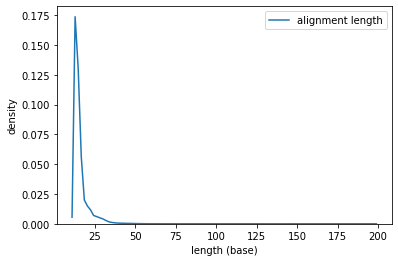

In [51]:
import seaborn as sb
#dfBlastOut['alignment length'].hist(bins=50)
sb.kdeplot(dfBlastOut['alignment length'])
plt.xlabel('length (base)')
plt.ylabel('density')
plt.show()

In [52]:
dicFa_query = fasta2dic('./RubberTreePromoterFasta.fa')
dicFa_subject = fasta2dic('./PLPR_all_d.fasta')

In [53]:
dfBlastOut['HitSequence_query']=dfBlastOut.apply(lambda x : dicFa_query[x['query acc.ver']][x['q. start']:x['q. end']], axis=1)

In [54]:
def get_subject_seq(x):
    if x['s. start'] < x['s. end']:
        return dicFa_subject[x['subject acc.ver']][x['s. start']:x['s. end']]
    else:
        return getRevComp(dicFa_subject[x['subject acc.ver']][x['s. end']:x['s. start']].upper())

In [55]:
dfBlastOut['HitSequence_subject']=dfBlastOut.apply(lambda x : get_subject_seq(x), axis=1)

In [56]:
dfBlastOut.head()

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,HitSequence_query,HitSequence_subject
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,16,0,0,53,68,175,190,0.054,30.1,tctataaatacctcA,tctataaatacctca
1,rna-XM_021809960.1,PLPR0492..AC:Z95153.2..OS:Helianthus,85.185,27,2,1,55,79,169,195,0.190,29.2,tataaatacctcAATTTATCCACT,tataaataccaccattcatatccact
2,rna-XM_021809960.1,PLPR0560..AC:X60159..OS:Glycine,100.000,15,0,0,35,49,135,121,0.190,28.3,taaaaaatttataa,ATAAAAAATTTATA
3,rna-XM_021809960.1,PLPR0018..AC:AF153195..OS:Solanum,84.000,25,4,0,55,79,168,192,0.190,28.3,tataaatacctcAATTTATCCACT,tataaatacctctacttcaccact
4,rna-XM_021809960.1,PLPR0050..AC:X60033..OS:Glycine,100.000,14,0,0,54,67,165,178,0.660,26.5,ctataaatacctc,ctataaatacctc


In [57]:
dfBlastOut.columns

Index(['query acc.ver', 'subject acc.ver', '% identity', 'alignment length',
       'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end',
       'evalue', 'bit score', 'HitSequence_query', 'HitSequence_subject'],
      dtype='object')

In [58]:
dfBlastOut_curated = dfBlastOut[['query acc.ver', 'subject acc.ver', '% identity', 'q. start', 'q. end','alignment length','HitSequence_query', 'HitSequence_subject']]

In [59]:
dfBlastOut_curated

,query acc.ver,subject acc.ver,% identity,q. start,q. end,alignment length,HitSequence_query,HitSequence_subject
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,53,68,16,tctataaatacctcA,tctataaatacctca
1,rna-XM_021809960.1,PLPR0492..AC:Z95153.2..OS:Helianthus,85.185,55,79,27,tataaatacctcAATTTATCCACT,tataaataccaccattcatatccact
2,rna-XM_021809960.1,PLPR0560..AC:X60159..OS:Glycine,100.000,35,49,15,taaaaaatttataa,ATAAAAAATTTATA
3,rna-XM_021809960.1,PLPR0018..AC:AF153195..OS:Solanum,84.000,55,79,25,tataaatacctcAATTTATCCACT,tataaatacctctacttcaccact
4,rna-XM_021809960.1,PLPR0050..AC:X60033..OS:Glycine,100.000,54,67,14,ctataaatacctc,ctataaatacctc
...,...,...,...,...,...,...,...,...
1044512,rna-XM_021808839.1,PLPR0312..AC:Y12636.1,100.000,391,402,12,AACTTTATAAA,aactttataaa
1044513,rna-XM_021808839.1,PLPR0309..AC:AF484252.1..OS:Nicotiana,100.000,15,26,12,TAATTGGTTTT,ATAATTGGTTT
1044514,rna-XM_021808839.1,PLPR0164..AC:U27980..OS:Arabidopsis,100.000,463,474,12,CTAAGAGGGTG,TCTAAGAGGGT
1044515,rna-XM_021808839.1,PLPR0118..AC:AF020542..OS:Malus,100.000,271,282,12,ACAATGATGTG,acaatgatgtg


In [60]:
dfBlastOut_curated.shape

(1044517, 8)

In [61]:
dfBlastOut_curated.head(10)

,query acc.ver,subject acc.ver,% identity,q. start,q. end,alignment length,HitSequence_query,HitSequence_subject
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,53,68,16,tctataaatacctcA,tctataaatacctca
1,rna-XM_021809960.1,PLPR0492..AC:Z95153.2..OS:Helianthus,85.185,55,79,27,tataaatacctcAATTTATCCACT,tataaataccaccattcatatccact
2,rna-XM_021809960.1,PLPR0560..AC:X60159..OS:Glycine,100.000,35,49,15,taaaaaatttataa,ATAAAAAATTTATA
3,rna-XM_021809960.1,PLPR0018..AC:AF153195..OS:Solanum,84.000,55,79,25,tataaatacctcAATTTATCCACT,tataaatacctctacttcaccact
4,rna-XM_021809960.1,PLPR0050..AC:X60033..OS:Glycine,100.000,54,67,14,ctataaatacctc,ctataaatacctc
5,rna-XM_021809960.1,PLPR0007..AC:L00670..OS:Arabidopsis,83.333,452,475,24,tttttcaaattttatcatagtat,TTTATTTAATTTTTATCATAGGA
6,rna-XM_021809960.1,PLPR0498..AC:AB002807..OS:Glycine,85.714,32,52,21,aaataaaaaatttataaaaa,aattgaaaaatttataacaa
7,rna-XM_021809960.1,PLPR0085..AC:AJ222771..OS:Pisum,90.000,33,52,20,aataaaaaatttataaaaa,AAATAAAAAATATAAAA
8,rna-XM_021809960.1,PLPR0085..AC:AJ222771..OS:Pisum,100.000,217,228,12,tattttattca,tattttattca
9,rna-XM_021809960.1,PLPR0541..AC:M25268.1..OS:Arabidopsis,93.750,45,60,16,ataaaaactctataa,ataaaaactctttaa


In [62]:
promoterInfo = ! cat PLPR_all_d.fasta | grep '>'

In [63]:
## 실행안되서 삭제함. 나는 왜 되는거지?? 
'''
dic = {
    'promoterID':[],
    'geneBank':[],
    'Organism':[],
    'GeneName':[],
    'Product':[],
    'PromoterRange':[],
    'CDS':[],
    'Info':[],
}

for each in promoterInfo[0:2]:
    eachList = each.split('..')
    dic['promoterID'].append(eachList[0])
    dic['geneBank'].append(eachList[1])
    dic['Organism'].append(eachList[2])
    dic['GeneName'].append(eachList[3])
    dic['Product'].append(eachList[4])
    dic['PromoterRange'].append(eachList[5])
    dic['CDS'].append(eachList[6])
    dic['Info'].append(eachList[7])
'''
dic = {
    'ID':[],
    'AC':[],
    'OS':[],
    'GENE':[],
    'CDS':[],
    'Taxon':[],
    'Promoter':[]
}

for each in promoterInfo:
    eachList1 = each.split('|')
    eachList2 = eachList1[0].split('..')
    eachList = eachList2 + eachList1[1:]
    eachListTmp = [x.split(':') for x in eachList if ':' in x]
    tmpDict = dict([x for x in eachListTmp if len(x) ==2])
    
    dic['ID'].append(eachList[0].replace('>',''))
    
    try :
        dic['AC'].append(tmpDict['AC'])
    except KeyError:
        dic['AC'].append('NA')
    try :
        dic['OS'].append(tmpDict['OS'])
    except KeyError:
        dic['OS'].append('NA')
    try :
        dic['GENE'].append(tmpDict['GENE'])
    except KeyError:
        dic['GENE'].append('NA')
    try :
        dic['CDS'].append(tmpDict['CDS'])
    except KeyError:
        dic['CDS'].append('NA')
    try :
        dic['Taxon'].append(tmpDict['Taxon'])
    except KeyError:
        dic['Taxon'].append('NA')
    try :
        dic['Promoter'].append(tmpDict['Promoter'])
    except KeyError:
        dic['Promoter'].append('NA')


In [64]:
dfPlantPromoterDB = pd.DataFrame(dic)

In [65]:
dfPlantPromoterDB.head()

,ID,AC,OS,GENE,CDS,Taxon,Promoter
0,PLPR0003,AB013815,Arabidopsis thaliana,DREB1A,+140,Dicot,TATA
1,PLPR0004,"AB013817, AB007789",Arabidopsis thaliana,DREB1C,+153,Dicot,TATA
2,PLPR0006,AF190297,Arabidopsis thaliana,TT1,+42,Dicot,TATA
3,PLPR0007,L00670,Arabidopsis thaliana,TMK1,+177,Dicot,TATA
4,PLPR0010,X80051,Phaseolus vulgaris,ME1,+163,Dicot,TATA


In [66]:
dfBlastOut_curated.head()

,query acc.ver,subject acc.ver,% identity,q. start,q. end,alignment length,HitSequence_query,HitSequence_subject
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,53,68,16,tctataaatacctcA,tctataaatacctca
1,rna-XM_021809960.1,PLPR0492..AC:Z95153.2..OS:Helianthus,85.185,55,79,27,tataaatacctcAATTTATCCACT,tataaataccaccattcatatccact
2,rna-XM_021809960.1,PLPR0560..AC:X60159..OS:Glycine,100.000,35,49,15,taaaaaatttataa,ATAAAAAATTTATA
3,rna-XM_021809960.1,PLPR0018..AC:AF153195..OS:Solanum,84.000,55,79,25,tataaatacctcAATTTATCCACT,tataaatacctctacttcaccact
4,rna-XM_021809960.1,PLPR0050..AC:X60033..OS:Glycine,100.000,54,67,14,ctataaatacctc,ctataaatacctc


In [67]:
dfBlastOut_curated['ID'] = dfBlastOut_curated['subject acc.ver'].apply(lambda x : x.split('..')[0])

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
dfBlastOut_curated.head()

,query acc.ver,subject acc.ver,% identity,q. start,q. end,alignment length,HitSequence_query,HitSequence_subject,ID
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,53,68,16,tctataaatacctcA,tctataaatacctca,PLPR0110
1,rna-XM_021809960.1,PLPR0492..AC:Z95153.2..OS:Helianthus,85.185,55,79,27,tataaatacctcAATTTATCCACT,tataaataccaccattcatatccact,PLPR0492
2,rna-XM_021809960.1,PLPR0560..AC:X60159..OS:Glycine,100.000,35,49,15,taaaaaatttataa,ATAAAAAATTTATA,PLPR0560
3,rna-XM_021809960.1,PLPR0018..AC:AF153195..OS:Solanum,84.000,55,79,25,tataaatacctcAATTTATCCACT,tataaatacctctacttcaccact,PLPR0018
4,rna-XM_021809960.1,PLPR0050..AC:X60033..OS:Glycine,100.000,54,67,14,ctataaatacctc,ctataaatacctc,PLPR0050


In [69]:
dfPlantPromoterDB_ix = dfPlantPromoterDB.set_index('ID')

In [70]:
dfPlantPromoterDB_ix.loc['PLPR0110']

AC              X78988
OS            Zea mays
GENE               MPI
CDS               +205
Taxon         Monocot 
Promoter     TATA-less
Name: PLPR0110, dtype: object

In [71]:
dfPlantPromoterDB_ix.loc[dfBlastOut_curated['ID'].values]['GENE']

ID
PLPR0110           MPI
PLPR0492    hsp17.6 G1
PLPR0560          N-20
PLPR0018         ChtC2
PLPR0050           GH3
               ...    
PLPR0312           AOS
PLPR0309       COMT II
PLPR0164          ACT4
PLPR0118         Ypr10
PLPR0091        TobRB7
Name: GENE, Length: 1044517, dtype: object

In [72]:
dfBlastOut_curated['GENE'] = dfPlantPromoterDB_ix.loc[dfBlastOut_curated['ID'].values]['GENE'].values

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
#dfBlastOut_curated['GENE'] = dfBlastOut_curated['ID'].apply(lambda x : dfPlantPromoterDB_ix.loc[x]['GENE'])

In [74]:
dfBlastOut_curated.head()

,query acc.ver,subject acc.ver,% identity,q. start,q. end,alignment length,HitSequence_query,HitSequence_subject,ID,GENE
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,53,68,16,tctataaatacctcA,tctataaatacctca,PLPR0110,MPI
1,rna-XM_021809960.1,PLPR0492..AC:Z95153.2..OS:Helianthus,85.185,55,79,27,tataaatacctcAATTTATCCACT,tataaataccaccattcatatccact,PLPR0492,hsp17.6 G1
2,rna-XM_021809960.1,PLPR0560..AC:X60159..OS:Glycine,100.000,35,49,15,taaaaaatttataa,ATAAAAAATTTATA,PLPR0560,N-20
3,rna-XM_021809960.1,PLPR0018..AC:AF153195..OS:Solanum,84.000,55,79,25,tataaatacctcAATTTATCCACT,tataaatacctctacttcaccact,PLPR0018,ChtC2
4,rna-XM_021809960.1,PLPR0050..AC:X60033..OS:Glycine,100.000,54,67,14,ctataaatacctc,ctataaatacctc,PLPR0050,GH3


In [75]:
dfBlastOut_curated['Promoter'] = [x.strip() for x in dfPlantPromoterDB_ix.loc[dfBlastOut_curated['ID'].values]['Promoter'].values]

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
dfBlastOut_curated['Promoter']

0          TATA-less
1               TATA
2               TATA
3               TATA
4               TATA
             ...    
1044512         TATA
1044513         TATA
1044514         TATA
1044515         TATA
1044516         TATA
Name: Promoter, Length: 1044517, dtype: object

In [77]:
m = dfBlastOut_curated['Promoter'] == 'TATA-less'
dfBlastOut_curated[m]

,query acc.ver,subject acc.ver,% identity,q. start,q. end,alignment length,HitSequence_query,HitSequence_subject,ID,GENE,Promoter
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,53,68,16,tctataaatacctcA,tctataaatacctca,PLPR0110,MPI,TATA-less
6,rna-XM_021809960.1,PLPR0498..AC:AB002807..OS:Glycine,85.714,32,52,21,aaataaaaaatttataaaaa,aattgaaaaatttataacaa,PLPR0498,nodulin-35 (N-35),TATA-less
7,rna-XM_021809960.1,PLPR0085..AC:AJ222771..OS:Pisum,90.000,33,52,20,aataaaaaatttataaaaa,AAATAAAAAATATAAAA,PLPR0085,gdcT,TATA-less
8,rna-XM_021809960.1,PLPR0085..AC:AJ222771..OS:Pisum,100.000,217,228,12,tattttattca,tattttattca,PLPR0085,gdcT,TATA-less
10,rna-XM_021809960.1,PLPR0051..AC:X56139..OS:Glycine,100.000,53,65,13,tctataaatacc,tctataaatacc,PLPR0051,sc514,TATA-less
...,...,...,...,...,...,...,...,...,...,...,...
1044501,rna-XM_021808839.1,PLPR0216..AC:X55970..OS:Arabidopsis,100.000,95,108,14,TAGGAGATGAAAA,GTAGGAGATGAAA,PLPR0216,photosystem II 10 kDa polypeptide,TATA-less
1044504,rna-XM_021808839.1,PLPR0509..AC:M76980.1..OS:Glycine,93.333,19,33,15,TGGTTTTTAATCTA,tgatttttaatcta,PLPR0509,vspB,TATA-less
1044506,rna-XM_021808839.1,PLPR0233..AC:X65606..OS:Hordeum,100.000,74,85,12,TTTGCAGCATG,ATTTGCAGCAT,PLPR0233,BKIN12,TATA-less
1044509,rna-XM_021808839.1,PLPR0202..AC:AF257186..OS:Arabidopsis,100.000,101,112,12,ATGAAAAGATT,GATGAAAAGAT,PLPR0202,DEX1,TATA-less


In [78]:
#Start Promoter4 Lecture
dfBlastOut_curated['OS'] = [x.strip() for x in dfPlantPromoterDB_ix.loc[dfBlastOut_curated['ID'].values]['OS'].values]

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
dfBlastOut_curated_ix = dfBlastOut_curated.set_index('query acc.ver')

In [80]:
from tqdm import tqdm

In [100]:
dic ={}
def fParse(x):
    try:
        dic[x['query acc.ver']].append(x['HitSequence_query'])
    except KeyError:
        dic[x['query acc.ver']] = [x['HitSequence_query']]
        
#dfBlastOut_curated.apply(fParse, axis=1)

#remove redundancy
#remove redundancy
dfBlastOut_curated[['query acc.ver', 'q. start','q. end','HitSequence_query']].shape

dfBlastOut_curated_rmrd = dfBlastOut_curated[['query acc.ver', 'q. start','q. end','HitSequence_query']].drop_duplicates()
dfBlastOut_curated_rmrd.apply(fParse, axis=1)   
    
'''for ix in tqdm(dfBlastOut_curated_ix.index.unique()):
    edf = dfBlastOut_curated_ix.loc[ix]
    dic['QueryID'].append(ix)
    try:
        dic['HitSequence_query'].append(','.join(edf['HitSequence_query'].values))
    except AttributeError:
        dic['HitSequence_query'].append(edf['HitSequence_query'])'''

"for ix in tqdm(dfBlastOut_curated_ix.index.unique()):\n    edf = dfBlastOut_curated_ix.loc[ix]\n    dic['QueryID'].append(ix)\n    try:\n        dic['HitSequence_query'].append(','.join(edf['HitSequence_query'].values))\n    except AttributeError:\n        dic['HitSequence_query'].append(edf['HitSequence_query'])"

In [101]:
dic_update={
    'QueryID':[],
    'HitSequence_query':[]
}

for key in dic:
    dic_update['QueryID'].append(key)
    dic_update['HitSequence_query'].append(','.join(dic[key]))

In [102]:
dfRubberTreePromoterBlockTable = pd.DataFrame(dic_update) #RubberTree Upstream sequence 
# we can compare 

In [105]:
dfRubberTreePromoterBlockTable.to_csv('RubberTreePromoterBlockTable.csv',index=False)

In [104]:
dfBlastOut_curated_ix.head()

,subject acc.ver,% identity,q. start,q. end,alignment length,HitSequence_query,HitSequence_subject,ID,GENE,Promoter,OS
query acc.ver,,,,,,,,,,,
rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,53,68,16,tctataaatacctcA,tctataaatacctca,PLPR0110,MPI,TATA-less,Zea mays
rna-XM_021809960.1,PLPR0492..AC:Z95153.2..OS:Helianthus,85.185,55,79,27,tataaatacctcAATTTATCCACT,tataaataccaccattcatatccact,PLPR0492,hsp17.6 G1,TATA,Helianthus annuus
rna-XM_021809960.1,PLPR0560..AC:X60159..OS:Glycine,100.000,35,49,15,taaaaaatttataa,ATAAAAAATTTATA,PLPR0560,N-20,TATA,Glycine max
rna-XM_021809960.1,PLPR0018..AC:AF153195..OS:Solanum,84.000,55,79,25,tataaatacctcAATTTATCCACT,tataaatacctctacttcaccact,PLPR0018,ChtC2,TATA,Solanum tuberosum
rna-XM_021809960.1,PLPR0050..AC:X60033..OS:Glycine,100.000,54,67,14,ctataaatacctc,ctataaatacctc,PLPR0050,GH3,TATA,Glycine max


In [106]:
## for visualization

dfBlastOut_curated_rmrd

,query acc.ver,q. start,q. end,HitSequence_query
0,rna-XM_021809960.1,53,68,tctataaatacctcA
1,rna-XM_021809960.1,55,79,tataaatacctcAATTTATCCACT
2,rna-XM_021809960.1,35,49,taaaaaatttataa
4,rna-XM_021809960.1,54,67,ctataaatacctc
5,rna-XM_021809960.1,452,475,tttttcaaattttatcatagtat
...,...,...,...,...
1044512,rna-XM_021808839.1,391,402,AACTTTATAAA
1044513,rna-XM_021808839.1,15,26,TAATTGGTTTT
1044514,rna-XM_021808839.1,463,474,CTAAGAGGGTG
1044515,rna-XM_021808839.1,271,282,ACAATGATGTG


In [109]:
dfBlastOut_curated_rmrd_ix = dfBlastOut_curated_rmrd.set_index('query acc.ver')

In [110]:
dfBlastOut_curated_rmrd_ix.loc['rna-XM_021809960.1']

,q. start,q. end,HitSequence_query
query acc.ver,,,
rna-XM_021809960.1,53,68,tctataaatacctcA
rna-XM_021809960.1,55,79,tataaatacctcAATTTATCCACT
rna-XM_021809960.1,35,49,taaaaaatttataa
rna-XM_021809960.1,54,67,ctataaatacctc
rna-XM_021809960.1,452,475,tttttcaaattttatcatagtat


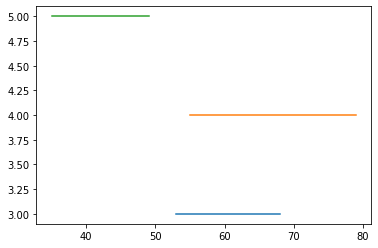

In [108]:
plt.plot([53,68],[3,3])
plt.plot([55,79],[4,4])
plt.plot([35,49],[5,5])

In [ ]:
dfBlastOut_curated_rmrd_ix.loc['rna-XM_021809960.1'].reset_index()
for ix in dfSub.index:
    edf = dfSub.loc[ix]
    x = [edf['q. start'], edf['q. end']]
    y = [ix, ix]
    plt.plot(x,y)